In [2]:
import pandas as pd

df = pd.read_csv("../data/baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,?,?,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4,5,162,0.306,0.37799999999999995
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5,4,162,0.315,0.40299999999999997
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,?,?,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,?,?,162,0.335,0.424


In [3]:
df.groupby(by=["Year"]).count().index

Index([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
      dtype='int64', name='Year')

In [4]:
df.shape

(1232, 15)

In [5]:
df['win_rate'] = df['W'] / df['G']
df['SLG_diff'] = df['SLG'] - pd.to_numeric(df['OSLG '], errors='coerce')
df['OBP_diff'] = df['OBP'] - pd.to_numeric(df['OOBP'], errors='coerce')
df = df[['OBP', 'SLG', 'BA', 'RS', 'OBP_diff', 'SLG_diff', 'win_rate']]

In [6]:
df.head()

,OBP,SLG,BA,RS,OBP_diff,SLG_diff,win_rate
0,0.328,0.418,0.259,734,0.011,0.003,0.500000
1,0.320,0.389,0.247,700,0.014,0.011,0.580247
2,0.311,0.417,0.247,712,-0.004,0.014,0.574074
3,0.315,0.415,0.260,734,-0.016,-0.013,0.425926
4,0.302,0.378,0.240,613,-0.033,-0.046,0.376543


**Split into train test**

In [7]:
import random

indices = list(range(df.shape[0]))
random.shuffle(indices)

TRAIN_PCT = 0.8

train_cutoff = int(len(indices)* 0.8)
train_df, test_df = df.iloc[indices[:train_cutoff], :], df.iloc[indices[train_cutoff:], :]

print('train shape: ',  train_df.shape)
print('test shape: ', test_df.shape)

train shape:  (985, 7)
test shape:  (247, 7)


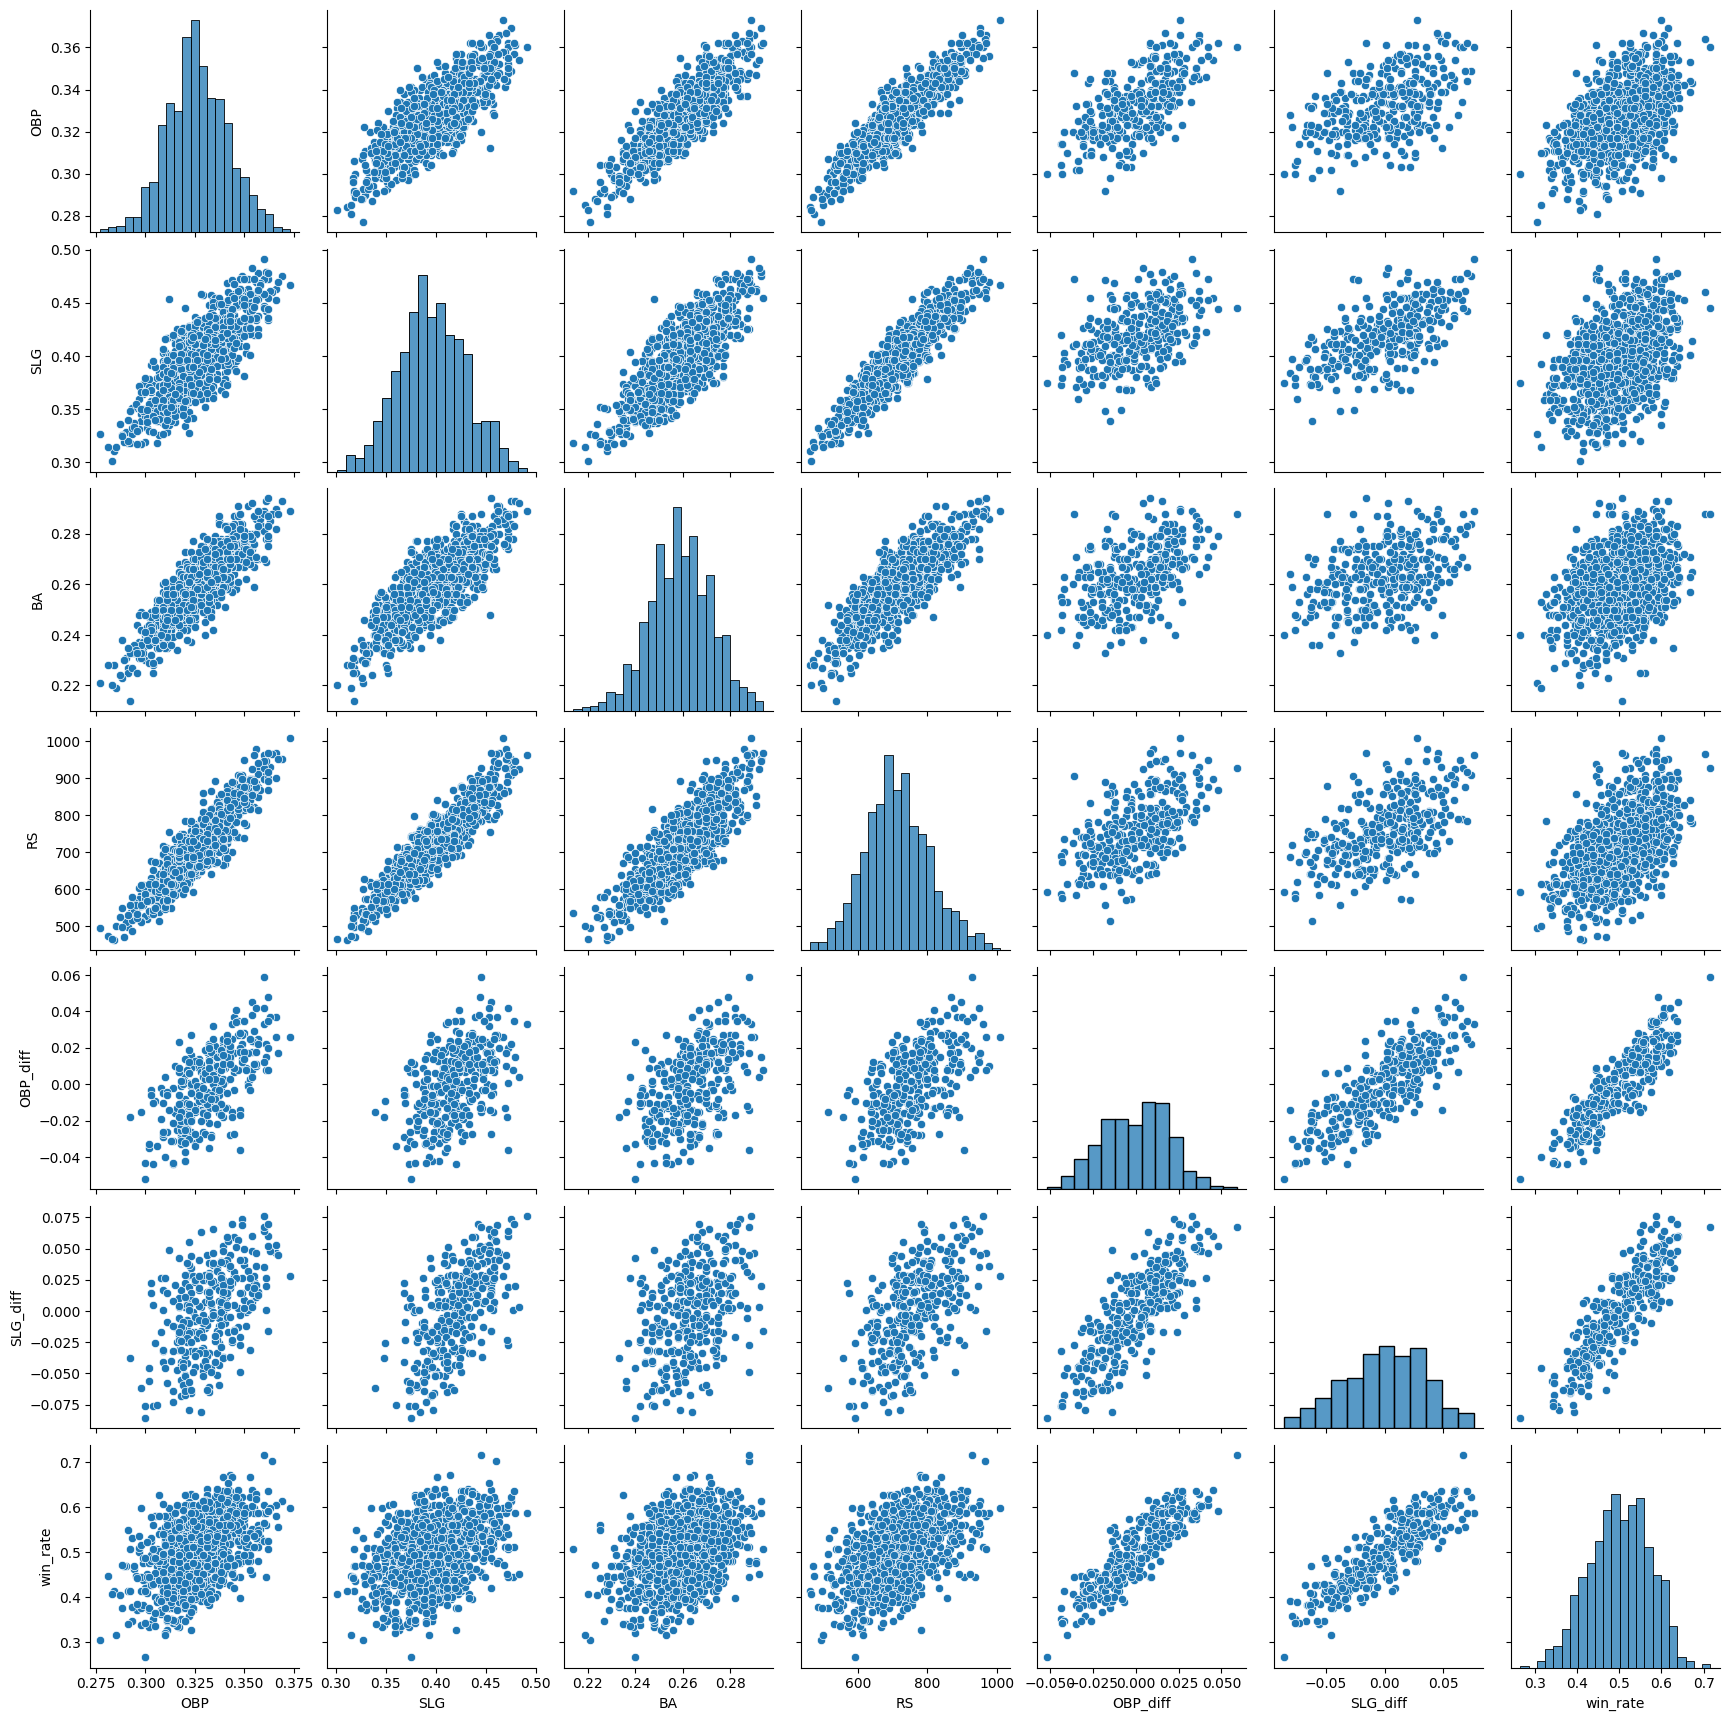

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_df)
plt.show()

**Simple Linear Regression**

0.8748383817960648


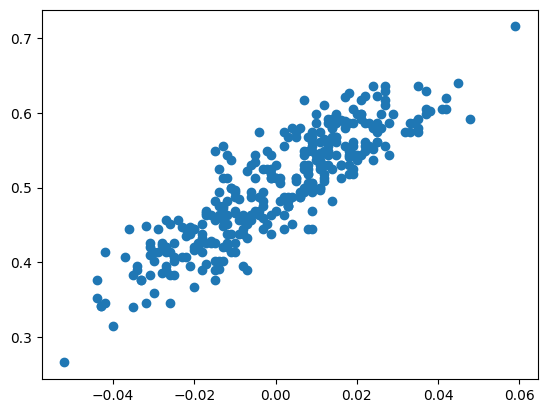

In [13]:
import matplotlib.pyplot as plt

#Calculate correlation
correlation = df['OBP_diff'].corr(df['win_rate'])
plt.scatter(train_df['OBP_diff'], train_df['win_rate'])
print(correlation)